## SCRAPING SITO DEL CENTRO RICERCA ICAR

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.icar.cnr.it/en/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
ICAR – CNR


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['#',
 '/area-riservata-personale/',
 'https://www.icar.cnr.it/en/responsabili-di-sede/',
 'https://www.icar.cnr.it/en/seminari/',
 'https://www.icar.cnr.it/',
 '#sidr-close',
 'https://www.icar.cnr.it/en/notizie/un-modello-previsionale-network-based-per-valutare-landamento-della-diffusione-epidemica-covid-19-in-italia-proposta-di-un-modello-epidemiologico-sir-con-lockdown-variabili/',
 'mailto:cosenza@icar.cnr.it',
 'https://www.icar.cnr.it/en/notizie/urban-intelligence-at-the-edge/',
 'https://www.icar.cnr.it/en/laboratori-icar/',
 'mailto:palermo@icar.cnr.it',
 'https://www.icar.cnr.it/en/normativa/',
 'https://www.icar.cnr.it/en/live-icar-tv/',
 'https://intranet.icar.cnr.it/',
 'https://www.icar.cnr.it/en/bandi-category/competition-announcements-and-contracts/',
 'https://www.icar.cnr.it/en/chi-siamo/',
 'https://twitter.com/ICAR_CNR',
 'https://www.linkedin.com/company/icar-cnr/',
 'https://www.icar.cnr.it/archivio-news/',
 'mailto:napoli@icar.cnr.it',
 '#outer-wrap',
 'https://w

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('https://www.icar.cnr.it/en/'), res))
lista_url2=list(set(lista_url2))
lista_url2

['https://www.icar.cnr.it/en/seminari/',
 'https://www.icar.cnr.it/en/responsabili-di-sede/',
 'https://www.icar.cnr.it/en/notizie/un-modello-previsionale-network-based-per-valutare-landamento-della-diffusione-epidemica-covid-19-in-italia-proposta-di-un-modello-epidemiologico-sir-con-lockdown-variabili/',
 'https://www.icar.cnr.it/en/notizie/urban-intelligence-at-the-edge/',
 'https://www.icar.cnr.it/en/laboratori-icar/',
 'https://www.icar.cnr.it/en/normativa/',
 'https://www.icar.cnr.it/en/live-icar-tv/',
 'https://www.icar.cnr.it/en/bandi-category/competition-announcements-and-contracts/',
 'https://www.icar.cnr.it/en/chi-siamo/',
 'https://www.icar.cnr.it/en/collaborazione/',
 'https://www.icar.cnr.it/en/archivio-associati-di-ricerca/',
 'https://www.icar.cnr.it/en/persone/',
 'https://www.icar.cnr.it/en/tecnologia/',
 'https://www.icar.cnr.it/en/notizie/',
 'https://www.icar.cnr.it/en/eventi/',
 'https://www.icar.cnr.it/en/valorizzazione-della-ricerca/',
 'https://www.icar.cnr.it/

In [6]:
indices=[3,8,12,16,17,18,26,31,32,38,40]
lista_url2 = [lista_url2[i] for i in indices]
lista_url2

['https://www.icar.cnr.it/en/notizie/urban-intelligence-at-the-edge/',
 'https://www.icar.cnr.it/en/chi-siamo/',
 'https://www.icar.cnr.it/en/tecnologia/',
 'https://www.icar.cnr.it/en/iot-cyber-physical-systems/',
 'https://www.icar.cnr.it/en/notizie/icar-meet-2020/',
 'https://www.icar.cnr.it/en/archivio-brevetti/',
 'https://www.icar.cnr.it/en/progetti/',
 'https://www.icar.cnr.it/en/spin-off/',
 'https://www.icar.cnr.it/en/pubblicazioni/',
 'https://www.icar.cnr.it/en/data-science/',
 'https://www.icar.cnr.it/en/intelligenza-artificiale/']

In [7]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"site-content"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Urban Intelligence at the Edge – ICAR',
 'About us – ICAR',
 'Technology – ICAR',
 'IoT & Cyber Physical Systems – ICAR',
 'ICAR Meet 2020 – ICAR',
 'Patents – ICAR',
 'Projects – ICAR',
 'spin-off – ICAR',
 'Pubblications – ICAR',
 'Data Science – ICAR',
 'Artificial Intelligence – ICAR']

In [8]:
print(texts[1])






3 Places: Rende, Napoli, Palermo.
ICAR, Institute for high performance computing and networking, is an Institute of the National Research Council (CNR) that belongs to the Department of Engineering, ICT and Technologies for Energy and Transport (DIITET). ICAR is present on the national territory with three offices, Rende, Napoli and Palermo. ICAR offers innovative solutions in terms of research, technology transfer and high education in the area of intelligent systems with complex functionality (cognitive systems and robotics, knowledge representation, extraction and reasoning, human-computer interface, optimization) and high performance computing (cloud computing, parallel and distributed environments and advanced technologies for the Internet). Significant applications are developed in the areas of e-health, energy, security, bioinformatics, cultural heritage, smart cities.
It was founded in June 2002 by the union of the Institute for Systems and Computer Science of Cosenza, the

### TEXT CLEANING

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

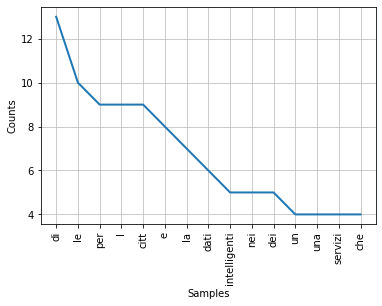

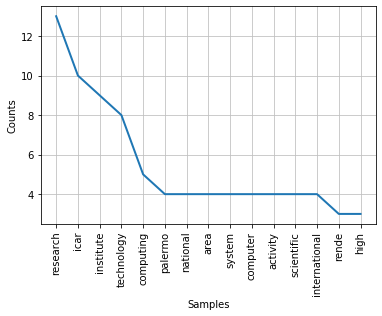

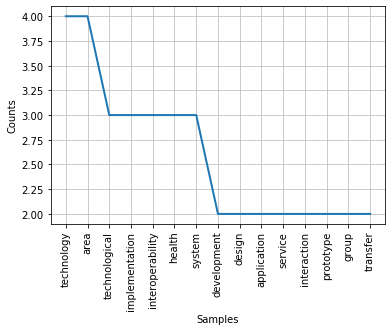

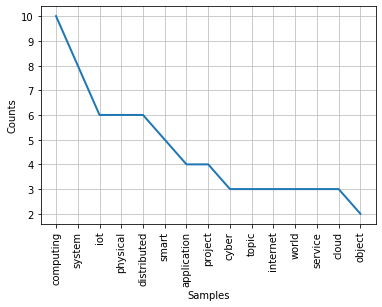

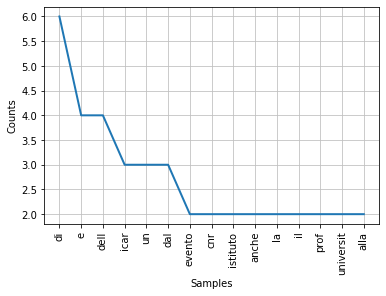

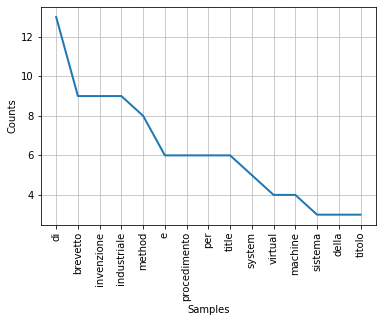

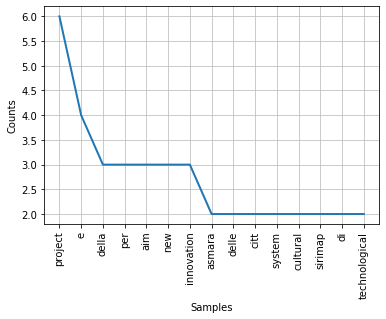

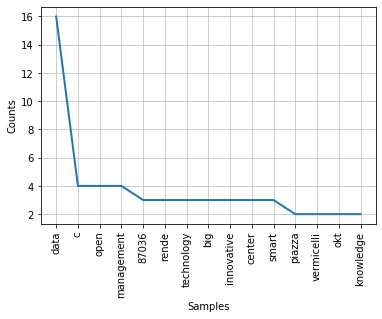

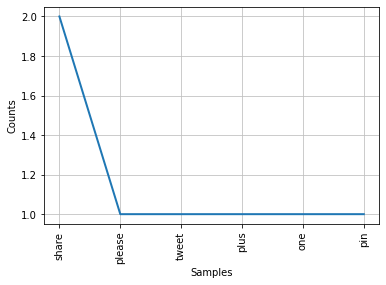

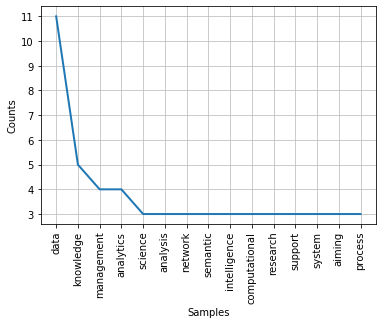

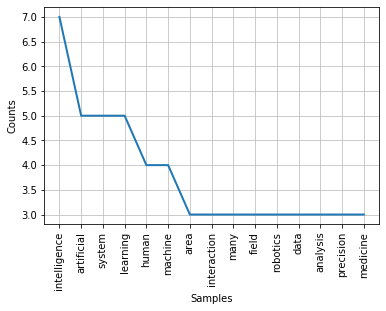

In [11]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

In [ ]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[2]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

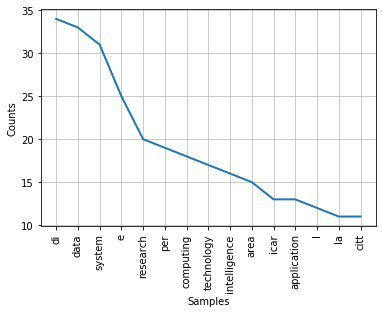

In [12]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

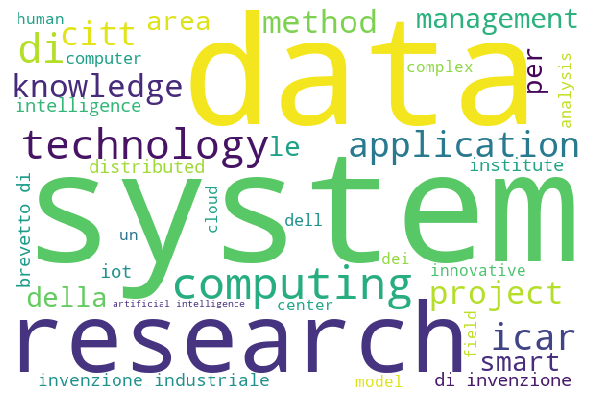

In [13]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## mutual information fra parola e centro di ricerca

In [14]:
from nltk import bigrams
import collections
import math
from math import log

#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2); p=probability, w=word 

In [15]:
a1=tot_text.split()    
a2=collections.Counter(a1)
a3=collections.Counter(bigrams(a1))
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} # word probabilities(w1 and w2)
a7={x:float(a3[x])/a5 for x in a3} # joint probabilites (w1&w2)
u = []
for x in a6:
    k={x:round(log(a7[b]/(a6[x] * a6[y]),2),4) for b in a7 for y in a6 if x and y in b}
    u.append(k)
    
u

[{'un': 8.1976},
 {'numero': 11.0049},
 {'speciale': 11.0049},
 {'dal': 8.683},
 {'titolo': 9.0049},
 {'urban': 8.42},
 {'intelligence': 7.0049},
 {'edge': 9.0049},
 {'stato': 11.0049},
 {'curato': 11.0049},
 {'ricercatore': 11.0049},
 {'del': 9.0049},
 {'cnr': 9.0049},
 {'icar': 7.3045},
 {'giandomenico': 11.0049},
 {'spezzano': 11.0049},
 {'per': 6.757},
 {'la': 7.5455},
 {'rivista': 11.0049},
 {'sensor': 11.0049},
 {'l': 7.42},
 {'obiettivo': 11.0049},
 {'quello': 11.0049},
 {'di': 5.9175},
 {'richiedere': 11.0049},
 {'alla': 9.42},
 {'comunit': 10.0049},
 {'scientifica': 10.0049},
 {'uno': 11.0049},
 {'sforzo': 11.0049},
 {'coordinato': 11.0049},
 {'comprendere': 11.0049},
 {'le': 7.683},
 {'opportunit': 11.0049},
 {'e': 6.3611},
 {'sfide': 11.0049},
 {'lo': 11.0049},
 {'sviluppo': 11.0049},
 {'soluzioni': 10.0049},
 {'intelligenti': 8.42},
 {'problemi': 10.0049},
 {'urbani': 10.0049},
 {'costruire': 11.0049},
 {'una': 8.42},
 {'citt': 7.5455},
 {'intelligente': 11.0049},
 {'necess

In [16]:
values = [list(d.values())[0] for d in u]
values.sort()

Lista2 = []
for x in values:
    for d in u:
        val = list(d.values())[0]

        if x == val:
            Lista2.append({list(d.keys())[0]: x})
Lista2

[{'di': 5.9175},
 {'data': 5.9605},
 {'system': 6.0507},
 {'e': 6.3611},
 {'research': 6.683},
 {'per': 6.757},
 {'computing': 6.835},
 {'technology': 6.9175},
 {'intelligence': 7.0049},
 {'area': 7.098},
 {'icar': 7.3045},
 {'application': 7.3045},
 {'icar': 7.3045},
 {'application': 7.3045},
 {'l': 7.42},
 {'la': 7.5455},
 {'citt': 7.5455},
 {'knowledge': 7.5455},
 {'project': 7.5455},
 {'method': 7.5455},
 {'management': 7.5455},
 {'machine': 7.5455},
 {'la': 7.5455},
 {'citt': 7.5455},
 {'knowledge': 7.5455},
 {'project': 7.5455},
 {'method': 7.5455},
 {'management': 7.5455},
 {'machine': 7.5455},
 {'la': 7.5455},
 {'citt': 7.5455},
 {'knowledge': 7.5455},
 {'project': 7.5455},
 {'method': 7.5455},
 {'management': 7.5455},
 {'machine': 7.5455},
 {'la': 7.5455},
 {'citt': 7.5455},
 {'knowledge': 7.5455},
 {'project': 7.5455},
 {'method': 7.5455},
 {'management': 7.5455},
 {'machine': 7.5455},
 {'la': 7.5455},
 {'citt': 7.5455},
 {'knowledge': 7.5455},
 {'project': 7.5455},
 {'method